In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from simulations import *

In [2]:
fss, uu, rr = feasibility_exp_EEN(num_robots=100, num_experiments = 20, seed_val=42)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [25:58<00:00, 77.92s/it]


Plot the results

In [13]:
# Converting the list of lists 'fss' into a NumPy array for fairsynergy allocation results
fsRes = np.asarray(fss)

# Converting the list of lists 'uu' into a NumPy array for uniform allocation results
uniformRes = np.asarray(uu)

# Converting the list of lists 'rr' into a NumPy array for random allocation results
randomRes = np.asarray(rr)

# Calculating the mean values across experiments for fairsynergy allocation results
fsMean = np.mean(fsRes, axis=0)

# Calculating the standard deviation across experiments for fairsynegy allocation results
fsStd = np.std(fsRes, axis=0)

# Calculating the mean values across experiments for uniform allocation results
uniformMean = np.mean(uniformRes, axis=0)

# Calculating the standard deviation across experiments for uniform allocation results
uniformStd = np.std(uniformRes, axis=0)

# Calculating the mean values across experiments for random allocation results
randomMean = np.mean(randomRes, axis=0)

# Calculating the standard deviation across experiments for random allocation results
randomStd = np.std(randomRes, axis=0)



In [5]:
# np.save("./experimental_data/EEN_Feasibility_Results_R100.npy", np.array([mean_1,mean_2,mean_3,std_1,std_2,std_3]))

In [9]:
# mean_1,mean_2,mean_3,std_1,std_2,std_3 = np.load("./experimental_data/EEN_Feasibility_Results_R100.npy")

(1.0, 100.0)

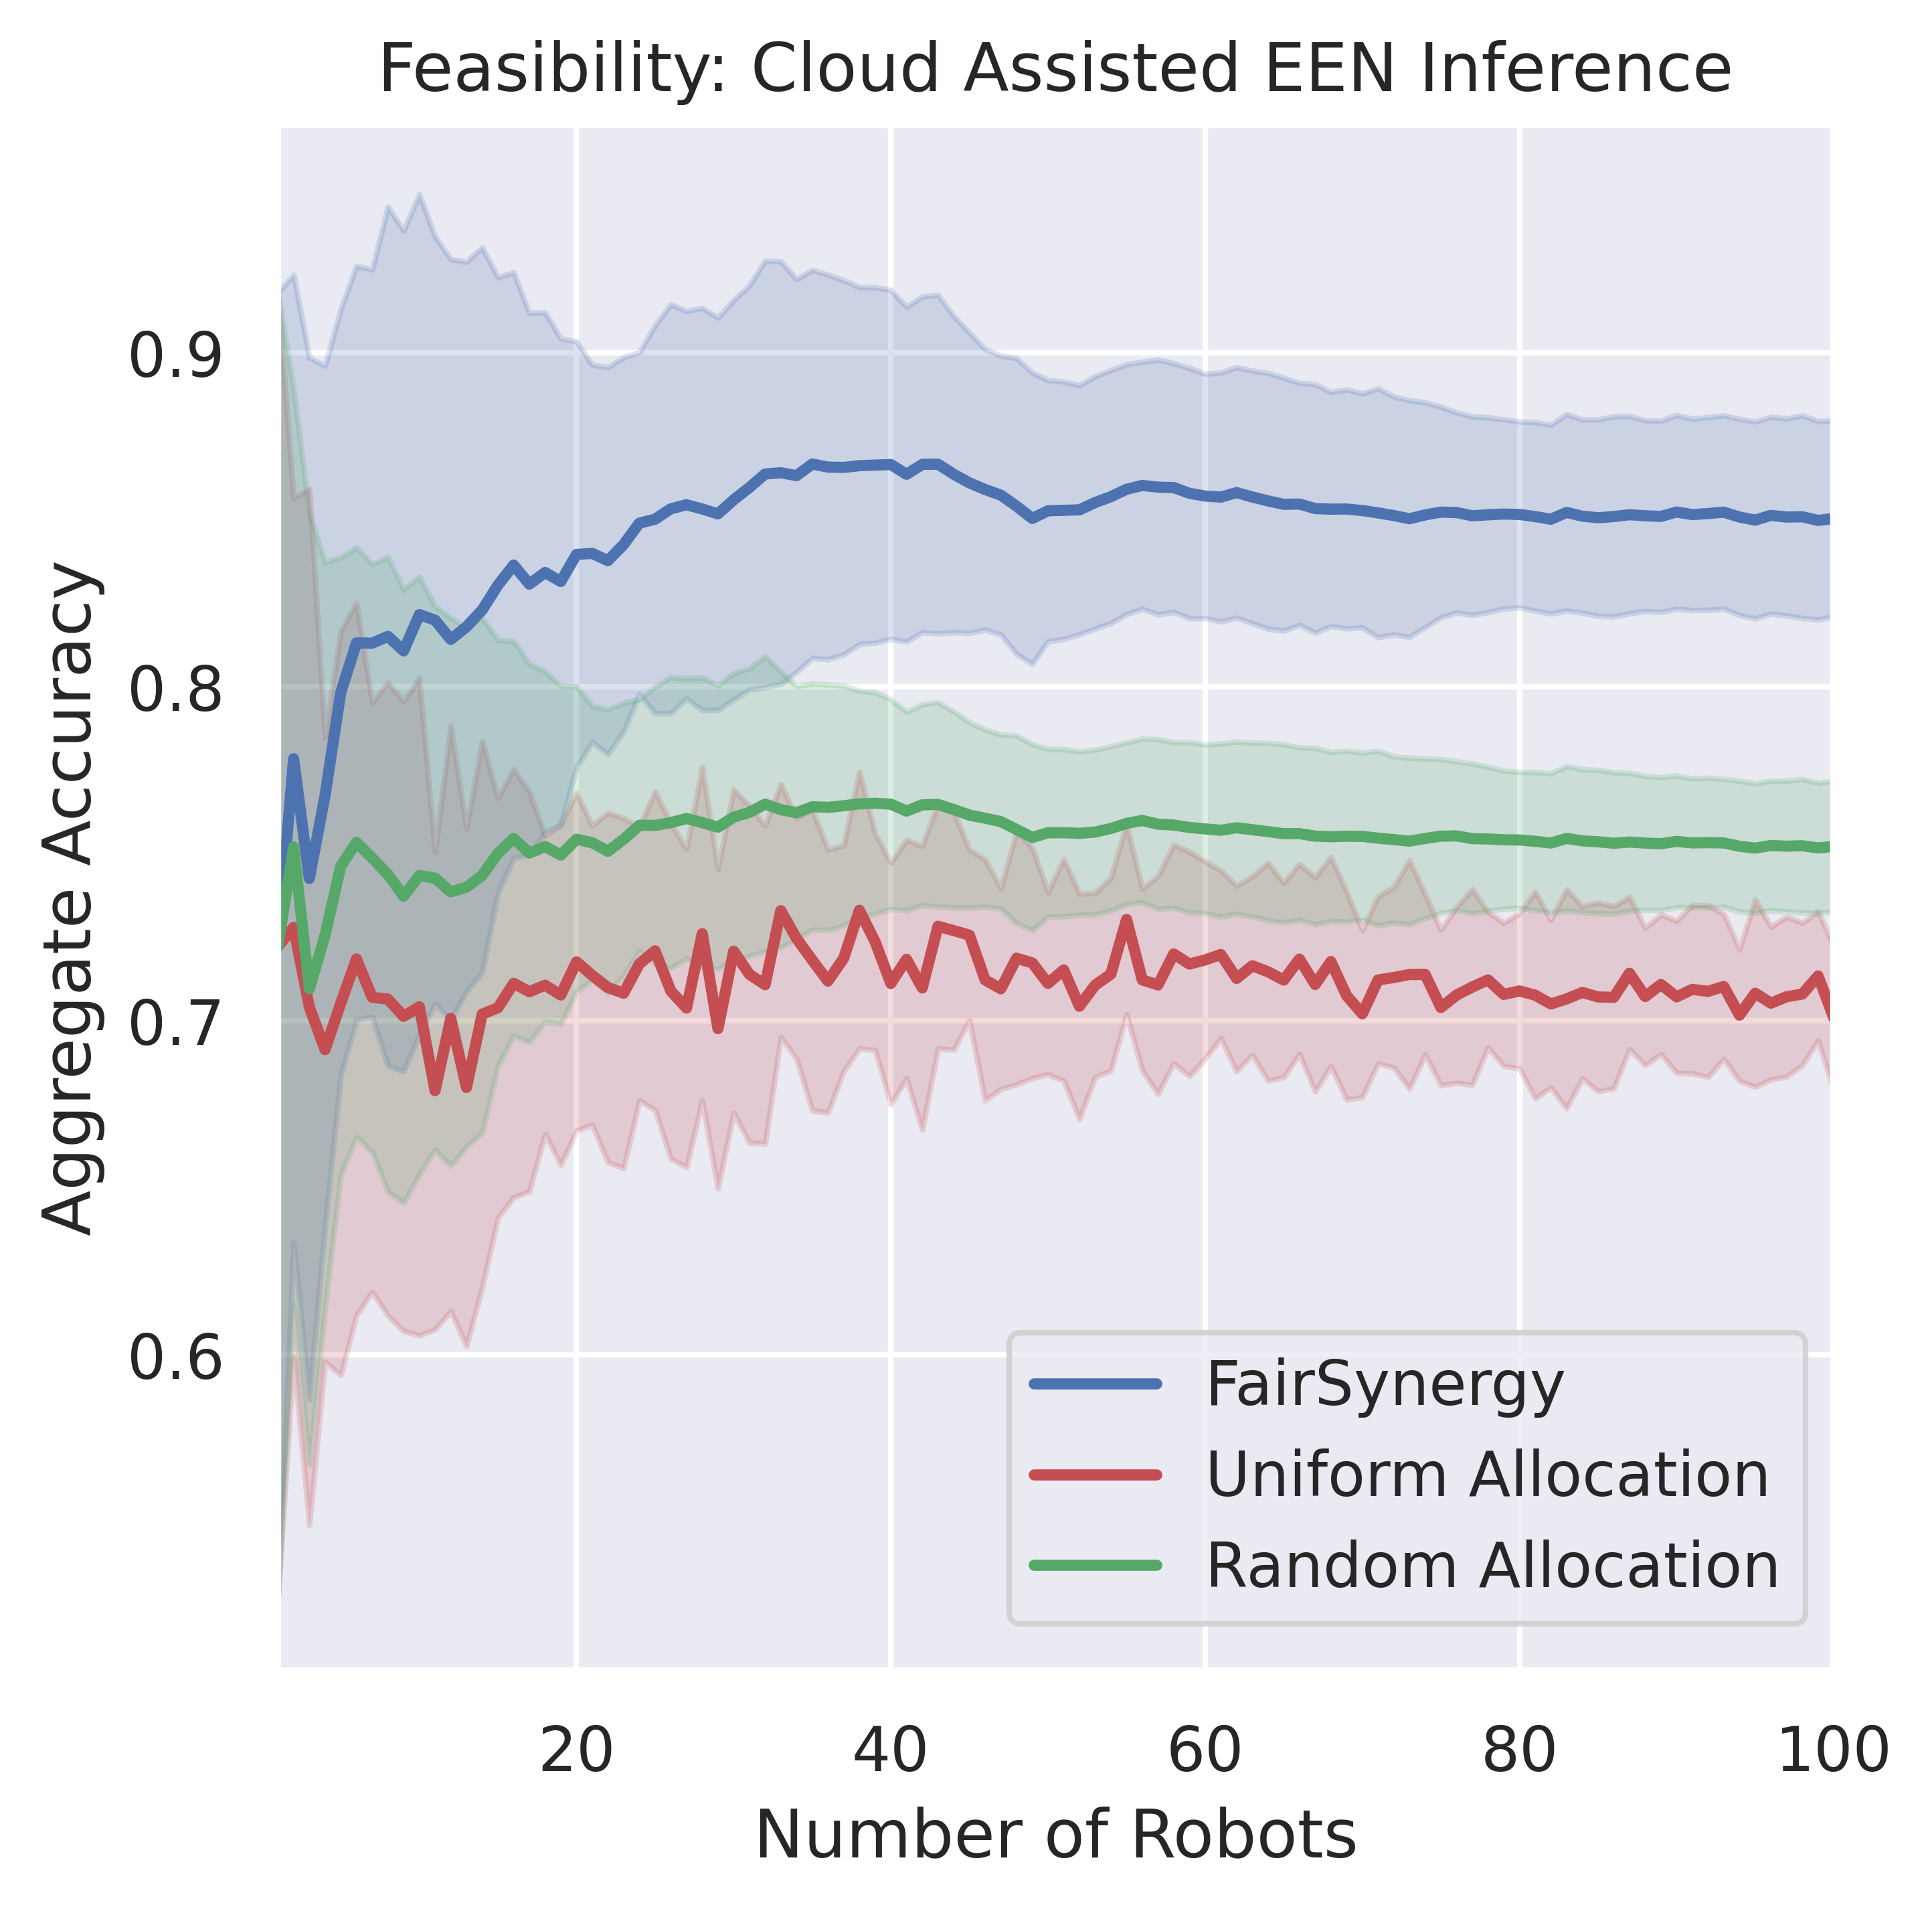

In [14]:
# Setting seaborn style for better visualization aesthetics
sns.set()

# Number of data points (number of robots) for x-axis, ranging from 1 to 100 (exclusive)
N = 101
x = np.arange(1, N)

# Mean and standard deviation values for different allocation methods
mean_1 = fsMean  # Mean values for utility-based bilevel allocation results
std_1 = fsStd    # Standard deviation for utility-based bilevel allocation results
mean_2 = uniformMean  # Mean values for uniform allocation results
std_2 = uniformStd    # Standard deviation for uniform allocation results
mean_3 = randomMean    # Mean values for random allocation results
std_3 = randomStd      # Standard deviation for random allocation results

# Creating a figure with specified size and resolution
plt.figure(figsize=(5, 5), dpi=600)

# Plotting mean values for different allocation methods
plt.plot(x, mean_1, 'b-', label='mean_1', lw=2)  # Utility-based bilevel allocation mean
plt.plot(x, mean_2, 'r-', label='mean_2', lw=2)  # Uniform allocation mean
plt.plot(x, mean_3, 'g-', label='mean_2', lw=2)  # Random allocation mean

# Filling the area between mean ± std for better visualization of variability
plt.fill_between(x, mean_2 - std_2, mean_2 + std_2, color='r', alpha=0.2)  # Uniform allocation std
plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)  # Utility-based bilevel allocation std
plt.fill_between(x, mean_3 - std_3, mean_3 + std_3, color='g', alpha=0.2)  # Random allocation std

# Setting x-axis and y-axis labels
plt.xlabel("Number of Robots")
plt.ylabel("Aggregate Accuracy")

# Setting the plot title
plt.title("Feasibility: Cloud Assisted EEN Inference")

# Adding a legend to the plot with specified location
plt.legend(["FairSynergy", "Uniform Allocation", "Random Allocation"], loc=[0.47, 0.03])

# Setting x-axis and y-axis limits for better visualization
plt.xlim([1, 100])